In [1]:
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
from urllib.request import urlopen

url_base = 'http://movie.naver.com/'
url_syb = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20181001'

page = urlopen(url_base+url_syb)

soup = BeautifulSoup(page, 'html.parser')
soup


<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20181001" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta cont

In [3]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=175727" title="극장판 헬로카봇 : 백악기 시대">극장판 헬로카봇 : 백악기 시대</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=172174" title="어느 가족">어느 가족</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10101" title="로마의 휴일">로마의 휴일</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=174301" title="카메라를 멈추면 안 돼!">카메라를 멈추면 안 돼!</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10039" title="플래툰">플래툰</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=174659" title="휘트니">휘트니</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=178214" title="루이스">루이스</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=11307" title="보디가드">보디가드</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164115" title="맘마미아!2">맘마미아!2</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=142241" title="다음 침공은 어디?">다음 침공은

In [4]:
soup.find_all('div', 'tit5')[0].a.string

'극장판 헬로카봇 : 백악기 시대'

In [5]:
soup.find_all('td', 'point')[0].string

'9.24'

In [6]:
date = pd.date_range('2018-6-24', periods=100, freq='D')
date

DatetimeIndex(['2018-06-24', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29', '2018-06-30', '2018-07-01',
               '2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
               '2018-07-06', '2018-07-07', '2018-07-08', '2018-07-09',
               '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13',
               '2018-07-14', '2018-07-15', '2018-07-16', '2018-07-17',
               '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-21',
               '2018-07-22', '2018-07-23', '2018-07-24', '2018-07-25',
               '2018-07-26', '2018-07-27', '2018-07-28', '2018-07-29',
               '2018-07-30', '2018-07-31', '2018-08-01', '2018-08-02',
               '2018-08-03', '2018-08-04', '2018-08-05', '2018-08-06',
               '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10',
               '2018-08-11', '2018-08-12', '2018-08-13', '2018-08-14',
               '2018-08-15', '2018-08-16', '2018-08-17', '2018-08-18',
      

In [7]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = 'http://movie.naver.com/' + 'movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'
    response = urlopen(html.format(date= urllib.parse.quote(today.strftime('%Y%m%d'))))
    
    soup = BeautifulSoup(response, 'html.parser')
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0,end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0,end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0,end)])

A Jupyter Widget

In [8]:
import pandas as pd
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie['point'] = movie['point'].astype(float)
movie.head()

,date,name,point
0,2018-06-24,당갈,9.60
1,2018-06-24,위대한 쇼맨,9.37
2,2018-06-24,킹 오브 프리즘 프라이드 더 히어로,9.24
3,2018-06-24,미드나잇 선,9.21
4,2018-06-24,러빙 빈센트,9.19


In [9]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
소공녀,861.51
당갈,829.52
시카리오: 데이 오브 솔다도,816.80
걸어도 걸어도,803.91
어벤져스: 인피니티 워,770.49


In [10]:
tmp = movie.query('name == ["시카리오: 데이 오브 솔다도"]')
tmp

,date,name,point
183,2018-06-28,시카리오: 데이 오브 솔다도,8.49
231,2018-06-29,시카리오: 데이 오브 솔다도,8.59
280,2018-06-30,시카리오: 데이 오브 솔다도,8.56
328,2018-07-01,시카리오: 데이 오브 솔다도,8.58
372,2018-07-02,시카리오: 데이 오브 솔다도,8.54
419,2018-07-03,시카리오: 데이 오브 솔다도,8.54
464,2018-07-04,시카리오: 데이 오브 솔다도,8.55
508,2018-07-05,시카리오: 데이 오브 솔다도,8.57
554,2018-07-06,시카리오: 데이 오브 솔다도,8.57
603,2018-07-07,시카리오: 데이 오브 솔다도,8.58


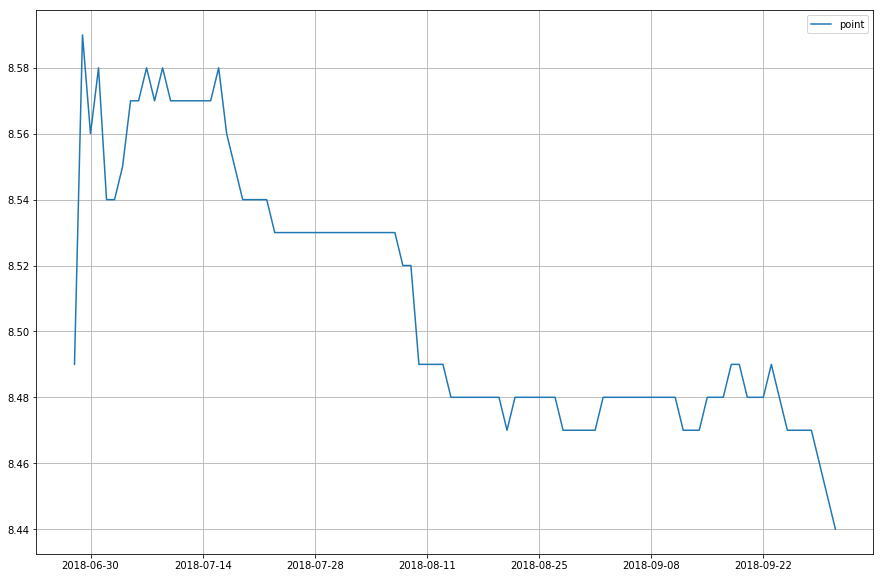

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (15,10))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc=0)
plt.grid()
plt.show()

In [12]:
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])

movie_pivot.head()

point                                                          \
name        1987 500일의 썸머 5일의 마중 개들의 섬 건축학개론 걸어도 걸어도   게이트 경성학교: 사라진 소녀들   
date                                                                       
2018-06-24   NaN      NaN    NaN   NaN   NaN     NaN  3.76           NaN   
2018-06-25   NaN      NaN    NaN   NaN   NaN     NaN  3.76           NaN   
2018-06-26   NaN      NaN    NaN  9.15   NaN     NaN  3.75           NaN   
2018-06-27   NaN      NaN    NaN  9.09   NaN     NaN  3.77           NaN   
2018-06-28   NaN      NaN    NaN  9.10   NaN    8.66   NaN           NaN   

                           ...                                               \
name       고양이를 빌려드립니다 곤지암 ... 피아니스트 피터 래빗 한여름의 판타지아  허스토리 혐오스런 마츠코의 일생  협상   
date                       ...                                                
2018-06-24         NaN NaN ...   NaN  9.00       NaN   NaN          NaN NaN   
2018-06-25         NaN NaN ...   NaN  9.00       NaN   NaN          NaN NaN   
2018-06-26         NaN NaN ...   NaN  9.00       NaN   NaN          NaN NaN   
2018-06-27         NaN NaN ...   NaN  8.99       NaN  9.66          NaN NaN   
2018-06-28         NaN NaN ...   NaN  8.99       NaN  9.59          NaN NaN   

                                     
name       호텔 아르테미스 환상의 빛 훌라 걸스 휘트니  
date                                 
2018-06-24      NaN   NaN   NaN NaN  
2018-06-25      NaN   NaN   NaN NaN  
2018-06-26      NaN   NaN   NaN NaN  
2018-06-27      NaN  8.01   NaN NaN  
2018-06-28      NaN  8.01   NaN NaN  

[5 rows x 202 columns]

In [13]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [14]:
movie_pivot.head()

name,1987,500일의 썸머,5일의 마중,개들의 섬,건축학개론,걸어도 걸어도,게이트,경성학교: 사라진 소녀들,고양이를 빌려드립니다,곤지암,...,피아니스트,피터 래빗,한여름의 판타지아,허스토리,혐오스런 마츠코의 일생,협상,호텔 아르테미스,환상의 빛,훌라 걸스,휘트니
date,,,,,,,,,,,,,,,,,,,,,
2018-06-24,NaN,NaN,NaN,NaN,NaN,NaN,3.76,NaN,NaN,NaN,...,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-25,NaN,NaN,NaN,NaN,NaN,NaN,3.76,NaN,NaN,NaN,...,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-26,NaN,NaN,NaN,9.15,NaN,NaN,3.75,NaN,NaN,NaN,...,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-27,NaN,NaN,NaN,9.09,NaN,NaN,3.77,NaN,NaN,NaN,...,NaN,8.99,NaN,9.66,NaN,NaN,NaN,8.01,NaN,NaN
2018-06-28,NaN,NaN,NaN,9.10,NaN,8.66,NaN,NaN,NaN,NaN,...,NaN,8.99,NaN,9.59,NaN,NaN,NaN,8.01,NaN,NaN


In [15]:
import platform
from matplotlib import font_manager, rc

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

In [ ]:
movie_pivot.plot(y=[])